In [14]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [16]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data'
categories = os.listdir(data_dir)


images=[]
labels=[]

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir,category)
  for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path,img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img,(64,64))
      images.append(img)
      labels.append(category)

images = np.array(images)

Tomato___healthy
Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___Bacterial_spot


In [17]:
x = np.array(images)
y = np.array(labels)

print("Labels:",np.unique(y))
print("Data Shape:",x.shape)

Labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data Shape: (12993, 64, 64, 3)


Class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1967
Tomato___healthy                          1926
Tomato___Early_blight                     1920
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1800
Tomato___Bacterial_spot                   1702
Name: count, dtype: int64


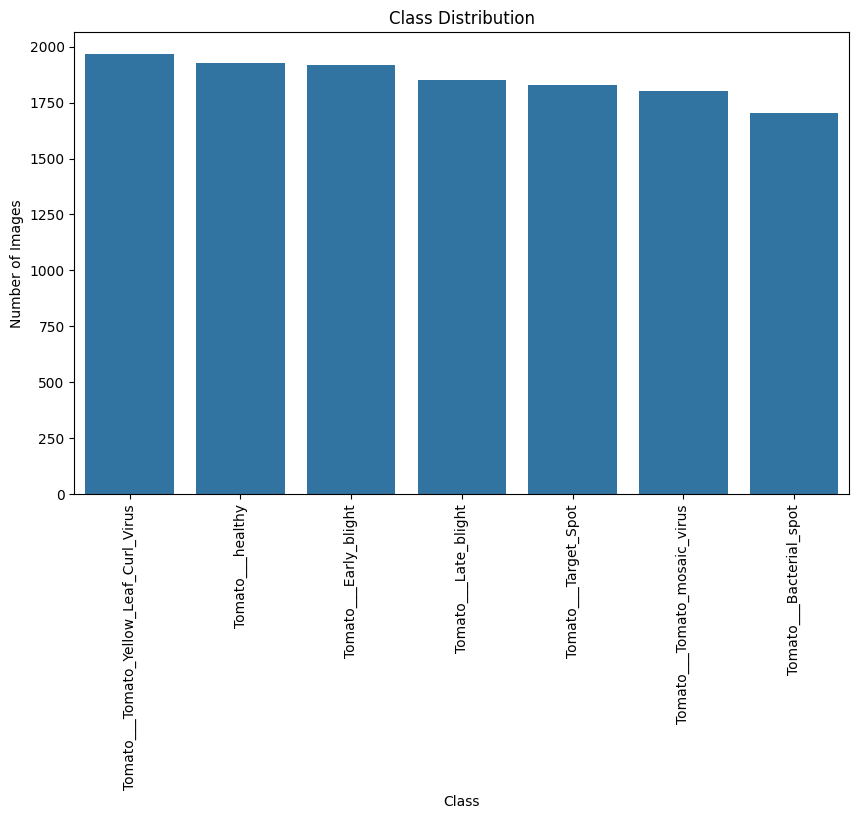

In [18]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution")
print(class_counts)


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images per class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()

In [19]:
valid_images = []
valid_labels = []

for img, label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x = np.array(valid_images)
y = np.array(valid_labels)

print("Cleaned Data Shape:",x.shape)

Cleaned Data Shape: (12993, 64, 64, 3)


In [20]:
le = LabelEncoder()
y = le.fit_transform(y)

class_names = le.classes_
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

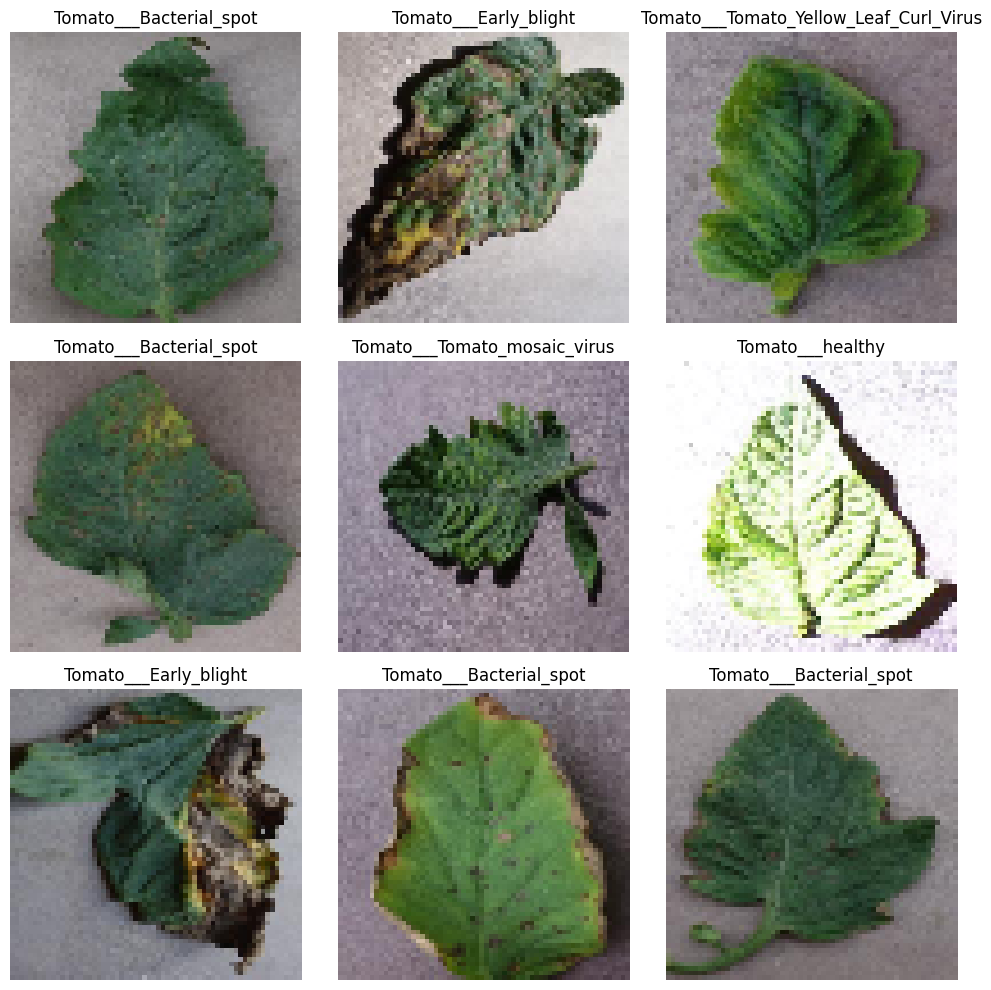

In [21]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y[idx]])
  plt.axis("off")
plt.tight_layout()
plt.show()

In [22]:
def extract_color_histogram(image,bins=(8,8,8)):

  image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image],[0,1,2],None,bins,[0,256,0,256,0,256])
  hist = cv2.normalize(hist,hist).flatten()
  return hist
hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)
x_features.shape

(12993, 512)

In [23]:
model = SVC(kernel='rbf',C=10,gamma='scale')

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Accuracy: 0.9742208541746825
F1 Score: 0.9741677871701659


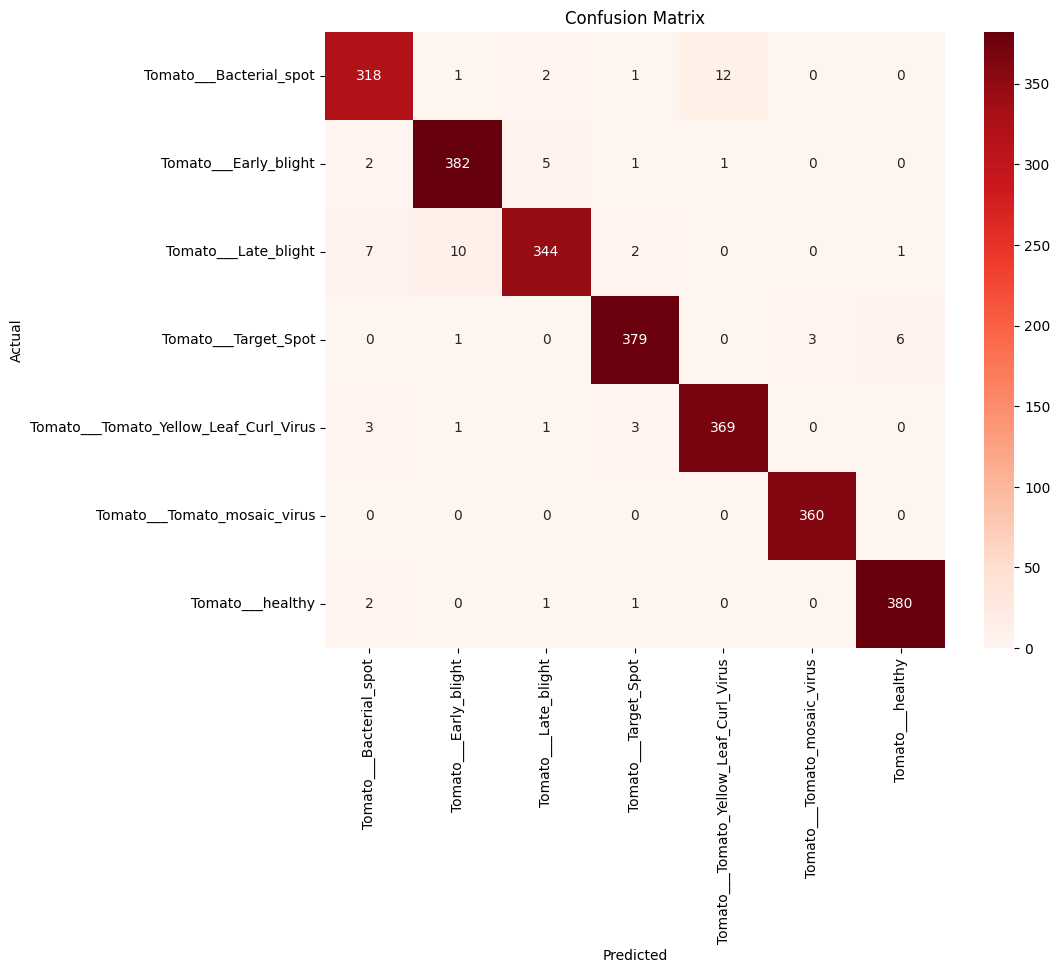

In [26]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

f1=f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
print("Classification Report")
print(classification_report(y_test,y_pred,target_names=class_names))

Classification Report
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.96      0.95      0.95       334
                 Tomato___Early_blight       0.97      0.98      0.97       391
                  Tomato___Late_blight       0.97      0.95      0.96       364
                  Tomato___Target_Spot       0.98      0.97      0.98       389
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.98      0.97       377
          Tomato___Tomato_mosaic_virus       0.99      1.00      1.00       360
                      Tomato___healthy       0.98      0.99      0.99       384

                              accuracy                           0.97      2599
                             macro avg       0.97      0.97      0.97      2599
                          weighted avg       0.97      0.97      0.97      2599

